In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


We are gonna predict if the user purchased the SUV, by only considering Age and Salary.

In [3]:
x = df.iloc[:, [2, 3]].values
y = df.iloc[:, 4].values


In [4]:
#splitting the dataset
from sklearn.cross_validation import train_test_split
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.25, random_state = 0)

/home/tushar/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [5]:
#feature scaling the data
from sklearn.preprocessing import StandardScaler
scx = StandardScaler()
trainx = scx.fit_transform(trainx)
testx = scx.transform(testx)

/home/tushar/.local/lib/python2.7/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Now the data is preprocessed. The LR is a linear classifier, which means that the two categories of in the 2 dimesnions is going to be seperated by a straight line.

In [6]:
#fitting the model
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(random_state = 0)
model = reg.fit(trainx, trainy)


In [7]:
#predicting results on test
predy = model.predict(testx)
comparison = pd.concat([pd.DataFrame(testy), pd.DataFrame(predy)], axis =1)
comparison.head(10)


,0,0
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,1,1
8,0,0
9,0,1


We are gonna make the confusion matrix to check the accuracy of the model. Note that function imported have all letter small in their name, whereas the classes have their initials as capital. Below imported is a function hence.

In [8]:
#checking the prediction accuracy.
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(testy, predy)
pd.DataFrame(cm)

,0,1
0,65,3
1,8,24


Precision = TP/(TP + FP)

Recall = TP/(FN+TP)

F1 = 2 x (precision * recall)/(precision + recall)

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score
print "Precision score is:"
print precision_score(testy, predy)

print "Recall score is:"
print recall_score(testy, predy)

print "F1 score is:"
print f1_score(testy, predy)


Precision score is:
0.888888888889
Recall score is:
0.75
F1 score is:
0.813559322034


Lets now visualize the result

In [10]:
from matplotlib.colors import ListedColormap
X_set, y_set = trainx, trainy
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

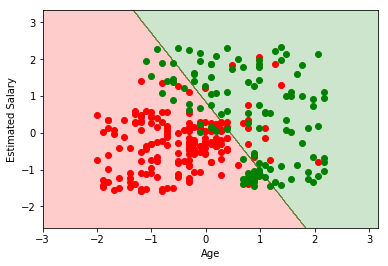

In [11]:
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.20, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

'''for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Training set)')
'''
#a simplified code to the above:
X_setd = pd.DataFrame(X_set)
x_p = X_setd.loc[(y_set ==0), :].values
x_n = X_setd.loc[(y_set ==1), :].values



plt.scatter(x_p[:, 0], x_p[:, 1], color = 'red')
plt.scatter(x_n[:, 0], x_n[:, 1], color = 'green')

plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [12]:
np.array([X1.ravel(), X2.ravel()]).T

array([[-2.99318916, -2.58254245],
       [-2.98318916, -2.58254245],
       [-2.97318916, -2.58254245],
       ..., 
       [ 3.13681084,  3.32745755],
       [ 3.14681084,  3.32745755],
       [ 3.15681084,  3.32745755]])

/home/tushar/.local/lib/python2.7/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20
  DeprecationWarning)


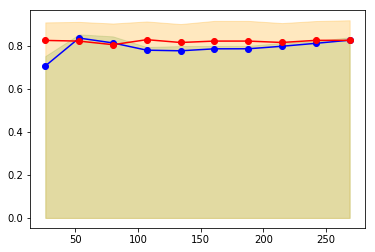

In [13]:
from sklearn.learning_curve import learning_curve
train_size, train_scores, test_scores = learning_curve(estimator = model, X = trainx, y = trainy, train_sizes = np.linspace(0.1, 1, 10), cv =10, n_jobs = 1)
train_mean = np.mean(train_scores, axis =1)
train_std = np.std(train_scores, axis =1)
test_mean = np.mean(test_scores, axis =1)
test_std = np.std(test_scores, axis =1)
plt.plot(train_size, train_mean, color = 'blue', marker = 'o')
plt.fill_between(train_size, train_mean + train_std, alpha = 0.15, color = 'green')

plt.plot(train_size, test_mean, color = 'red', marker = 'o')
plt.fill_between(train_size, test_mean + test_std, alpha = 0.25, color = 'orange')
